# Features and Definitions

1. **DATE ADDED TO CATALOG**: Date the study was added to the GWAS catalog.  
2. **PUBMEDID**: Unique identifier for the publication in PubMed.  
3. **FIRST AUTHOR**: Name of the first author of the study.  
4. **DATE**: Publication date of the study.  
5. **JOURNAL**: Journal where the study was published.  
6. **LINK**: URL to the publication or related resource.  
7. **STUDY**: Description of the study.  
8. **DISEASE/TRAIT**: Disease or trait studied.  
9. **INITIAL SAMPLE SIZE**: Size of the initial sample used in the study.  
10. **REPLICATION SAMPLE SIZE**: Size of the replication sample used to validate findings.  
11. **REGION**: Genomic region associated with the findings.  
12. **CHR_ID**: Chromosome ID where the SNP is located.  
13. **CHR_POS**: Chromosomal position of the SNP.  
14. **REPORTED GENE(S)**: Genes reported in the study related to the SNP.  
15. **MAPPED_GENE**: Genes mapped to the SNP.  
16. **UPSTREAM_GENE_ID**: Gene ID upstream of the SNP.  
17. **DOWNSTREAM_GENE_ID**: Gene ID downstream of the SNP.  
18. **SNP_GENE_IDS**: IDs of genes related to the SNP.  
19. **UPSTREAM_GENE_DISTANCE**: Distance from the SNP to the upstream gene.  
20. **DOWNSTREAM_GENE_DISTANCE**: Distance from the SNP to the downstream gene.  
21. **STRONGEST SNP-RISK ALLELE**: SNP and risk allele with the strongest association.  
22. **SNPS**: Single Nucleotide Polymorphisms studied.  
23. **MERGED**: Indicator if the SNP was merged with others.  
24. **SNP_ID_CURRENT**: Current identifier for the SNP.  
25. **CONTEXT**: Genomic context of the SNP (e.g., intronic, exonic).  
26. **INTERGENIC**: Indicates if the SNP is between genes.  
27. **RISK ALLELE FREQUENCY**: Frequency of the risk allele in the population.  
28. **P-VALUE**: Statistical significance of the SNP association.  
29. **PVALUE_MLOG**: -log10 transformation of the p-value.  
30. **P-VALUE (TEXT)**: P-value as text.  
31. **OR or BETA**: Effect size or odds ratio for the SNP.  
32. **95% CI (TEXT)**: Confidence interval for the effect size or odds ratio.  
33. **PLATFORM [SNPS PASSING QC]**: Genotyping platform used and SNPs passing quality control.  
34. **CNV**: Copy number variation information.

# Features Relationships in Dataset

# Importing Libraries

In [156]:
# Essentials
import numpy as np
import pandas as pd

# Processing/Statistics

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA) and Cleaning

Reading Data

In [157]:
genetic_df = pd.read_csv(r"C:\Users\dahab\OneDrive\Desktop\T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making\datasets\genetic\filtered_diabetes_data.csv")

First rows

In [158]:
genetic_df.head()

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV
0,2010-09-28,20818381,Yamauchi T,2010-09-05,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/20818381,A genome-wide association study in the Japanes...,Type 2 diabetes,"4,470 Japanese ancestry cases, 3,071 Japanese ...","10,692 Japanese ancestry cases, 9,597 Japanese...",...,intergenic_variant,1.0,0.58,9.000000e-14,13.045757,NaN,1.11,[1.08-1.14],Illumina [459359],N
1,2013-01-23,23137000,Lin HJ,2012-11-09,Ophthalmic Genet,www.ncbi.nlm.nih.gov/pubmed/23137000,Novel susceptibility genes associated with dia...,Cataracts in type 2 diabetes,"109 Han Chinese ancestry cases, 649 Han Chines...",NaN,...,intron_variant,0.0,NR,3.000000e-06,5.522879,NaN,NaN,NaN,Illumina [517401],N
2,2013-01-23,23137000,Lin HJ,2012-11-09,Ophthalmic Genet,www.ncbi.nlm.nih.gov/pubmed/23137000,Novel susceptibility genes associated with dia...,Cataracts in type 2 diabetes,"109 Han Chinese ancestry cases, 649 Han Chines...",NaN,...,intron_variant,0.0,NR,5.000000e-06,5.301030,NaN,NaN,NaN,Illumina [517401],N
3,2015-01-21,24974787,Meng W,2014-06-26,Eur J Pain,www.ncbi.nlm.nih.gov/pubmed/24974787,A genome-wide association study suggests an as...,Neuropathic pain in type 2 diabetes,"572 European ancestry cases, 2,491 European an...",NaN,...,intergenic_variant,1.0,0.7092,2.000000e-07,6.698970,NaN,1.49,[NR],"Affymetrix, Illumina [6494962] (imputed)",N
4,2015-01-21,24974787,Meng W,2014-06-26,Eur J Pain,www.ncbi.nlm.nih.gov/pubmed/24974787,A genome-wide association study suggests an as...,Neuropathic pain in type 2 diabetes,"572 European ancestry cases, 2,491 European an...",NaN,...,intergenic_variant,1.0,0.12,1.000000e-06,6.000000,NaN,2.26,[NR],"Affymetrix, Illumina [6494962] (imputed)",N


Last rows

In [159]:
genetic_df.tail()

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV
6609,2024-05-24,38652878,Im C,2024-04-23,J Clin Oncol,www.ncbi.nlm.nih.gov/pubmed/38652878,Trans-Ancestral Genetic Risk Factors for Treat...,Type 2 diabetes in childhood cancer survivors,"43 African American or Afro-Caribbean cases, 5...",NaN,...,intron_variant,0.0,0.05,5.000000e-07,6.301030,NaN,10.19,[4.12-25.21],NR [9666030],N
6610,2024-05-24,38652878,Im C,2024-04-23,J Clin Oncol,www.ncbi.nlm.nih.gov/pubmed/38652878,Trans-Ancestral Genetic Risk Factors for Treat...,Type 2 diabetes in childhood cancer survivors,"261 European ancestry cases, 2,841 European an...",NaN,...,intron_variant,0.0,0.15,1.000000e-07,7.000000,NaN,NaN,NaN,NR [8986646],N
6611,2024-05-24,38652878,Im C,2024-04-23,J Clin Oncol,www.ncbi.nlm.nih.gov/pubmed/38652878,Trans-Ancestral Genetic Risk Factors for Treat...,Type 2 diabetes in childhood cancer survivors,"261 European ancestry cases, 2,841 European an...",NaN,...,intergenic_variant,1.0,0.1,5.000000e-08,7.301030,NaN,NaN,NaN,NR [8986646],N
6612,2024-05-24,38652878,Im C,2024-04-23,J Clin Oncol,www.ncbi.nlm.nih.gov/pubmed/38652878,Trans-Ancestral Genetic Risk Factors for Treat...,Type 2 diabetes in childhood cancer survivors,"261 European ancestry cases, 2,841 European an...",NaN,...,intergenic_variant,1.0,0.05,6.000000e-09,8.221849,NaN,NaN,NaN,NR [8986646],N
6613,2024-05-24,38652878,Im C,2024-04-23,J Clin Oncol,www.ncbi.nlm.nih.gov/pubmed/38652878,Trans-Ancestral Genetic Risk Factors for Treat...,Type 2 diabetes in childhood cancer survivors,"261 European ancestry cases, 2,841 European an...",NaN,...,intron_variant,0.0,0.05,2.000000e-07,6.698970,NaN,NaN,NaN,NR [8986646],N


Dropping redundant columns

In [160]:
# Drop the specified columns
columns_to_drop = [
    'DATE ADDED TO CATALOG', 'PUBMEDID', 'FIRST AUTHOR', 
    'DATE', 'JOURNAL', 'LINK', 'REPLICATION SAMPLE SIZE', 
    'REPORTED GENE(S)', 'SNP_ID_CURRENT', 'P-VALUE (TEXT)', 'CNV'
]

genetic_df = genetic_df.drop(columns=columns_to_drop)
genetic_df.head(1)

,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REGION,CHR_ID,CHR_POS,MAPPED_GENE,UPSTREAM_GENE_ID,DOWNSTREAM_GENE_ID,SNP_GENE_IDS,...,SNPS,MERGED,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC]
0,A genome-wide association study in the Japanes...,Type 2 diabetes,"4,470 Japanese ancestry cases, 3,071 Japanese ...",15q22.2,15,62104190,NPM1P47 - C2CD4B,ENSG00000259466,ENSG00000205502,NaN,...,rs7172432,0.0,intergenic_variant,1.0,0.58,9.000000e-14,13.045757,1.11,[1.08-1.14],Illumina [459359]


Checking value counts of each column

In [161]:
# Check value counts for each column
for column in genetic_df.columns:
    print(f"Value counts for {column}:\n{genetic_df[column].value_counts()}\n")

Value counts for STUDY:
STUDY
Discovery of 318 new risk loci for type 2 diabetes and related vascular outcomes among 1.4 million participants in a multi-ancestry meta-analysis.                                                                                   1345
Multi-ancestry genetic study of type 2 diabetes highlights the power of diverse populations for discovery and translation.                                                                                                            827
Fine-mapping type 2 diabetes loci to single-variant resolution using high-density imputation and islet-specific epigenome maps.                                                                                                       400
Genome-wide discovery for diabetes-dependent triglycerides-associated loci.                                                                                                                                                           334
A cross-population atlas of geneti

Concise Summary of Data

In [162]:
genetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6614 entries, 0 to 6613
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   STUDY                       6614 non-null   object 
 1   DISEASE/TRAIT               6614 non-null   object 
 2   INITIAL SAMPLE SIZE         6614 non-null   object 
 3   REGION                      6245 non-null   object 
 4   CHR_ID                      6245 non-null   object 
 5   CHR_POS                     6245 non-null   object 
 6   MAPPED_GENE                 6245 non-null   object 
 7   UPSTREAM_GENE_ID            2109 non-null   object 
 8   DOWNSTREAM_GENE_ID          2109 non-null   object 
 9   SNP_GENE_IDS                4105 non-null   object 
 10  UPSTREAM_GENE_DISTANCE      2109 non-null   float64
 11  DOWNSTREAM_GENE_DISTANCE    2109 non-null   float64
 12  STRONGEST SNP-RISK ALLELE   6614 non-null   object 
 13  SNPS                        6614 

Checking and Dropping duplicates

In [163]:
# Check the number of duplicate rows before dropping
duplicates_before = genetic_df.duplicated().sum()
print(f"Number of duplicate rows before dropping: {duplicates_before}")

# Drop duplicate rows
genetic_df = genetic_df.drop_duplicates()

# Check the number of duplicate rows after dropping
duplicates_after = genetic_df.duplicated().sum()
print(f"Number of duplicate rows after dropping: {duplicates_after}")

Number of duplicate rows before dropping: 4
Number of duplicate rows after dropping: 0


Checking missing values

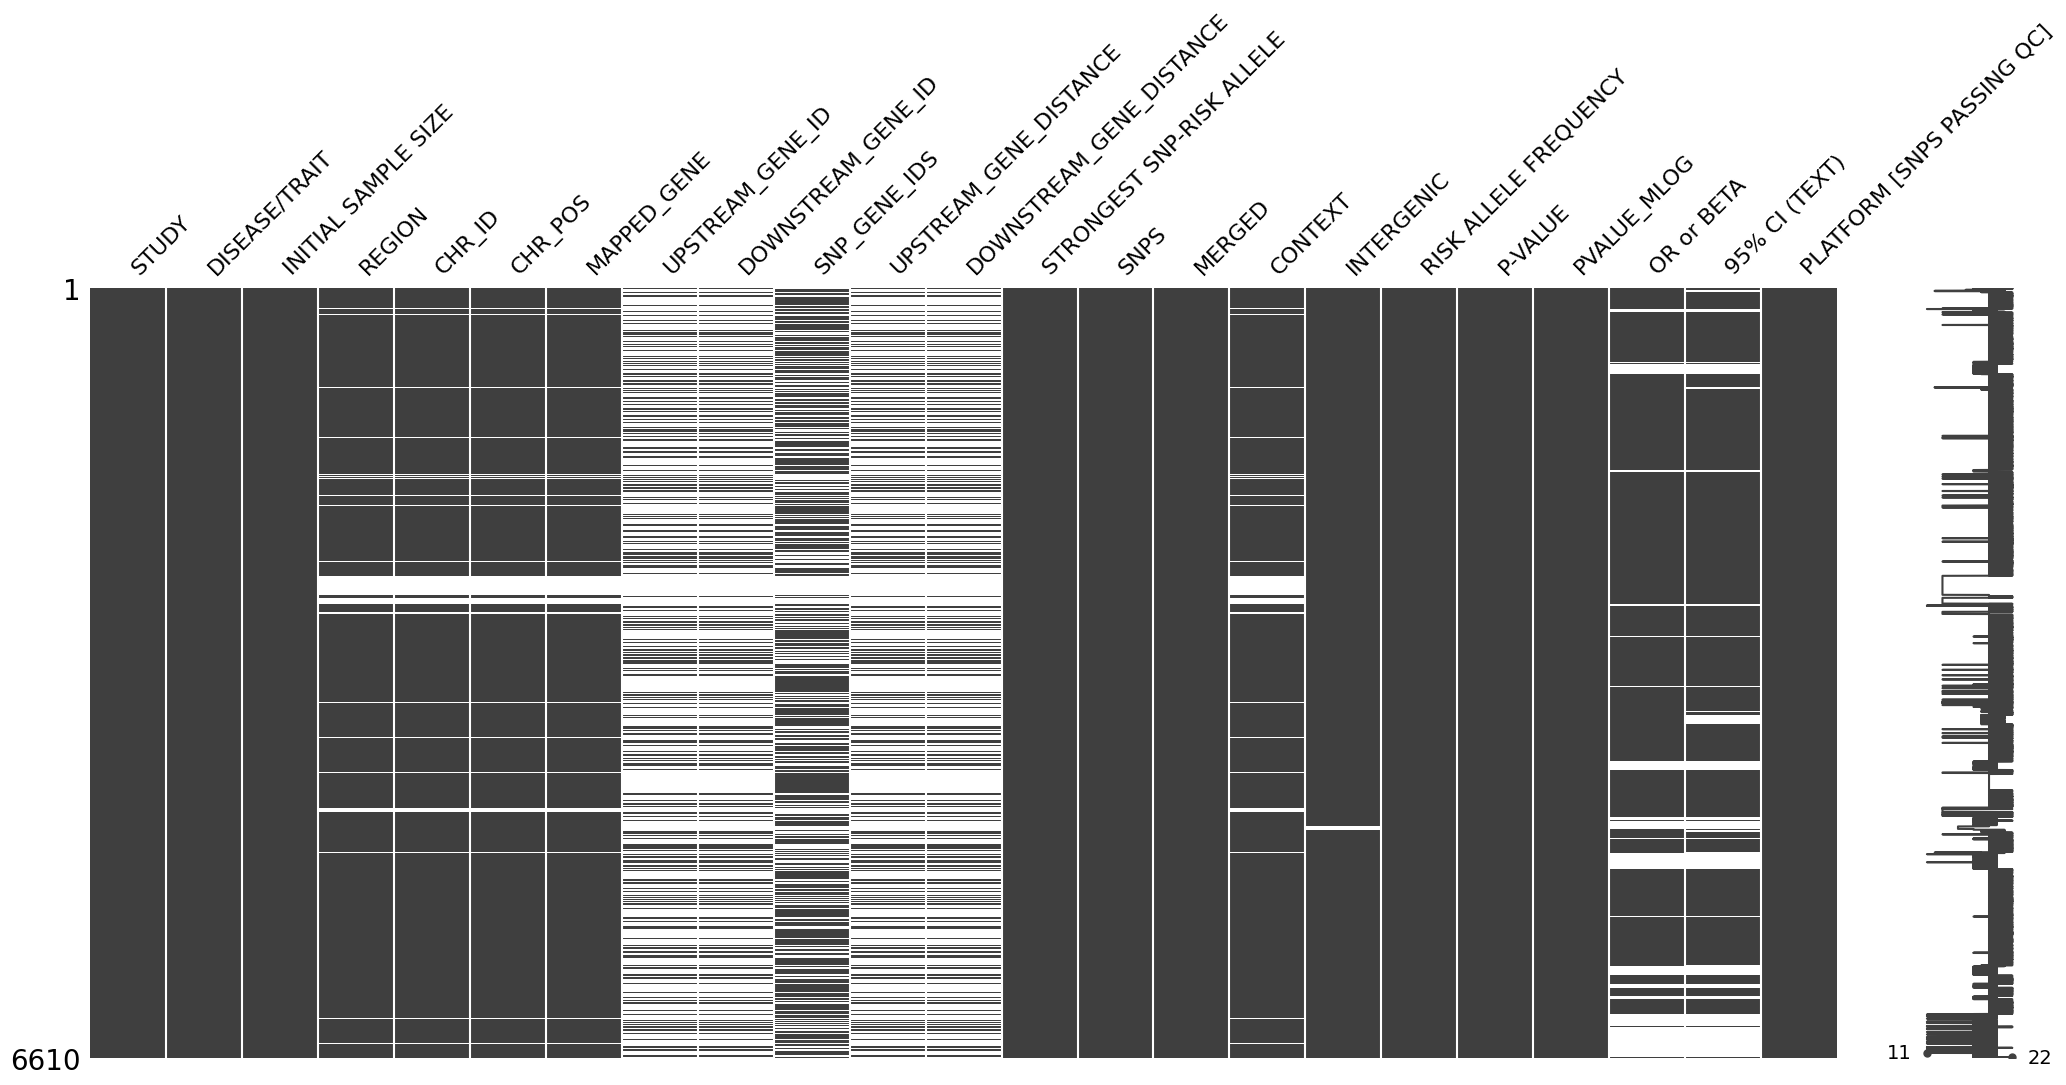

STUDY                            0
DISEASE/TRAIT                    0
INITIAL SAMPLE SIZE              0
REGION                         369
CHR_ID                         369
CHR_POS                        369
MAPPED_GENE                    369
UPSTREAM_GENE_ID              4502
DOWNSTREAM_GENE_ID            4502
SNP_GENE_IDS                  2508
UPSTREAM_GENE_DISTANCE        4502
DOWNSTREAM_GENE_DISTANCE      4502
STRONGEST SNP-RISK ALLELE        0
SNPS                             0
MERGED                           0
CONTEXT                        369
INTERGENIC                      31
RISK ALLELE FREQUENCY            0
P-VALUE                          0
PVALUE_MLOG                      0
OR or BETA                     983
95% CI (TEXT)                 1159
PLATFORM [SNPS PASSING QC]       0
dtype: int64

In [164]:
msno.matrix(genetic_df)
plt.show()

genetic_df.isnull().sum()

Dropping missing values of gene related columns

In [165]:
# Since they are all related we are dropping one of them and the rest will be dropped accordingly
genetic_df = genetic_df.dropna(subset=['REGION'])
genetic_df.isnull().sum()

STUDY                            0
DISEASE/TRAIT                    0
INITIAL SAMPLE SIZE              0
REGION                           0
CHR_ID                           0
CHR_POS                          0
MAPPED_GENE                      0
UPSTREAM_GENE_ID              4133
DOWNSTREAM_GENE_ID            4133
SNP_GENE_IDS                  2139
UPSTREAM_GENE_DISTANCE        4133
DOWNSTREAM_GENE_DISTANCE      4133
STRONGEST SNP-RISK ALLELE        0
SNPS                             0
MERGED                           0
CONTEXT                          0
INTERGENIC                      31
RISK ALLELE FREQUENCY            0
P-VALUE                          0
PVALUE_MLOG                      0
OR or BETA                     945
95% CI (TEXT)                 1115
PLATFORM [SNPS PASSING QC]       0
dtype: int64

Checking columns with 'NR' values

In [166]:
# Check for 'NR' in each column and count occurrences
columns_with_nr = genetic_df.isin(['NR']).sum()

# Filter only columns with at least one 'NR' value
columns_with_nr = columns_with_nr[columns_with_nr > 0]

# Display columns with 'NR' and their counts
print("Columns containing 'NR' and their counts:")
print(columns_with_nr)

Columns containing 'NR' and their counts:
RISK ALLELE FREQUENCY    2249
95% CI (TEXT)              66
dtype: int64


Dropping rows with 'NR' values

In [167]:
# Drop rows where any column contains 'NR'
genetic_df = genetic_df[~genetic_df.isin(['NR']).any(axis=1)]

# Verify the changes
print(f"Remaining rows after dropping rows with 'NR': {genetic_df.shape[0]}")

Remaining rows after dropping rows with 'NR': 3970


Cleaning `CHR_POS` column

In [168]:
genetic_df['CHR_POS'].value_counts()

CHR_POS
112998590    43
117172544    26
22134095     19
123346931    16
12265895     15
81694033     15
2837316      14
92975544     14
63178651     13
14858657     13
12351626     13
7231610      12
92703125     11
27508073     11
185811292    10
81501185     10
186947857     9
229537208     9
17387083      9
127613496     8
213985913     8
134528909     8
14751196      8
2818521       8
19268740      8
44413724      7
45184122      7
60359572      7
126470949     7
56510924      7
80143021      7
185793899     7
152599323     7
20679478      6
26202862      6
120979061     6
44366172      6
90968837      6
122407996     6
28140937      6
77454848      6
53782363      6
20661019      6
56514478      6
1246511       6
22301093      6
37739961      6
4290085       6
108236003     6
32980164      6
117172786     6
50821065      6
2670270       6
27812217      6
17388025      6
79290675      6
72722053      6
75707853      6
67788548      6
53767042      6
33399932      5
30688836      5


In [169]:
# Remove unrelated or non-numeric values
genetic_df['CHR_POS'] = genetic_df['CHR_POS'].apply(lambda x: str(x).split('x')[0].strip() if 'x' in str(x) else x)
genetic_df = genetic_df[genetic_df['CHR_POS'].str.isdigit()]  # Keep only rows where CHR_POS is numeric

# Verify the cleaned column
print(genetic_df['CHR_POS'].value_counts())

CHR_POS
112998590    43
117172544    26
22134095     19
123346931    16
12265895     15
81694033     15
2837316      14
92975544     14
63178651     13
14858657     13
12351626     13
7231610      12
92703125     11
27508073     11
185811292    10
81501185     10
186947857     9
229537208     9
17387083      9
127613496     8
213985913     8
134528909     8
14751196      8
2818521       8
19268740      8
44413724      7
45184122      7
60359572      7
126470949     7
56510924      7
80143021      7
185793899     7
152599323     7
20679478      6
26202862      6
120979061     6
44366172      6
90968837      6
122407996     6
28140937      6
77454848      6
53782363      6
20661019      6
56514478      6
1246511       6
22301093      6
37739961      6
4290085       6
108236003     6
32980164      6
117172786     6
50821065      6
2670270       6
27812217      6
17388025      6
79290675      6
72722053      6
75707853      6
67788548      6
53767042      6
33399932      5
30688836      5


Cleaning `CHR_ID` column

In [170]:
genetic_df['CHR_ID'].value_counts()

CHR_ID
3     317
10    294
11    287
6     276
2     271
12    257
7     225
1     214
9     212
5     204
4     197
8     187
15    173
17    162
19    121
16    118
13    105
20    102
18     88
14     72
22     57
X      22
21      9
Name: count, dtype: int64

In [171]:
# Remove unrelated or non-numeric values
genetic_df['CHR_ID'] = genetic_df['CHR_ID'].apply(lambda x: str(x).split('x')[0].strip() if 'x' in str(x) else x)
genetic_df = genetic_df[genetic_df['CHR_ID'].str.isdigit()]  # Keep only rows where CHR_ID is numeric

# Verify the cleaned column
print(genetic_df['CHR_ID'].value_counts())

CHR_ID
3     317
10    294
11    287
6     276
2     271
12    257
7     225
1     214
9     212
5     204
4     197
8     187
15    173
17    162
19    121
16    118
13    105
20    102
18     88
14     72
22     57
21      9
Name: count, dtype: int64


Cleaning `RISK ALLELE FREQUENCY` column

In [172]:
genetic_df['RISK ALLELE FREQUENCY'].value_counts()

RISK ALLELE FREQUENCY
0.3                    15
0.31                   12
0.38                   12
0.41                   11
0.57                   11
0.34                   11
0.32                   11
0.43                   11
0.28                   10
0.5                    10
0.46                   10
0.22                   10
0.29                   10
0.67                   10
0.45                    9
0.27                    9
0.58                    8
0.82                    8
0.56                    8
0.53                    8
0.18                    8
0.61                    8
0.83                    8
0.2                     8
0.16                    8
0.7                     7
0.64                    7
0.44                    7
0.05                    7
0.15                    7
0.26                    7
0.17                    7
0.47                    7
0.986                   7
0.69                    7
0.42                    7
0.78                    7
0.39            

In [173]:
# Remove rows where 'RISK ALLELE FREQUENCY' is '0.26 (EA+AA)'
genetic_df = genetic_df[genetic_df['RISK ALLELE FREQUENCY'] != '0.26 (EA+AA)']

# Verify the changes
print(f"Remaining rows after removing '0.26 (EA+AA)': {genetic_df.shape[0]}")

Remaining rows after removing '0.26 (EA+AA)': 3947


Cleaning `STRONGEST SNP-RISK ALLELE` column

In [182]:
# Check if the last letter is '?'
question_mark_count = genetic_df['STRONGEST SNP-RISK ALLELE'].str.endswith('?').sum()

# Print the result
print(f"Number of entries ending with '?': {question_mark_count}")

Number of entries ending with '?': 38


In [183]:
# Drop rows where 'STRONGEST SNP-RISK ALLELE' ends with '?'
genetic_df = genetic_df[~genetic_df['STRONGEST SNP-RISK ALLELE'].str.endswith('?')]

# Verify the changes
print(f"Remaining rows after dropping entries ending with '?': {genetic_df.shape[0]}")

Remaining rows after dropping entries ending with '?': 3909


Changing data types

In [174]:
# Convert specific columns to appropriate data types
genetic_df['CHR_ID'] = genetic_df['CHR_ID'].astype(int)
genetic_df['CHR_POS'] = genetic_df['CHR_POS'].astype(int)
genetic_df['UPSTREAM_GENE_DISTANCE'] = genetic_df['UPSTREAM_GENE_DISTANCE'].astype(int, errors='ignore') # ignoring errors due to future splitting of Data
genetic_df['DOWNSTREAM_GENE_DISTANCE'] = genetic_df['DOWNSTREAM_GENE_DISTANCE'].astype(int, errors='ignore') # ignoring errors due to future splitting of Data
genetic_df['MERGED'] = genetic_df['MERGED'].astype(int)
genetic_df['INTERGENIC'] = genetic_df['INTERGENIC'].astype(int)
genetic_df['RISK ALLELE FREQUENCY'] = genetic_df['RISK ALLELE FREQUENCY'].astype(float)
print(genetic_df.dtypes)

STUDY                          object
DISEASE/TRAIT                  object
INITIAL SAMPLE SIZE            object
REGION                         object
CHR_ID                          int32
CHR_POS                         int32
MAPPED_GENE                    object
UPSTREAM_GENE_ID               object
DOWNSTREAM_GENE_ID             object
SNP_GENE_IDS                   object
UPSTREAM_GENE_DISTANCE        float64
DOWNSTREAM_GENE_DISTANCE      float64
STRONGEST SNP-RISK ALLELE      object
SNPS                           object
MERGED                          int32
CONTEXT                        object
INTERGENIC                      int32
RISK ALLELE FREQUENCY         float64
P-VALUE                       float64
PVALUE_MLOG                   float64
OR or BETA                    float64
95% CI (TEXT)                  object
PLATFORM [SNPS PASSING QC]     object
dtype: object


Checking `INTERGENIC` values correctness

In [190]:
def check_mapped_gene_intergenic(genetic_df):
    def validate_row(row):
        if ' - ' in row['MAPPED_GENE'] and row['INTERGENIC'] == 1:
            return True
        elif ' - ' not in row['MAPPED_GENE'] and row['INTERGENIC'] == 0:
            return True
        else:
            return False
 
    # Validate without adding a new column
    invalid_rows = genetic_df.loc[
        ~genetic_df.apply(validate_row, axis=1), ['MAPPED_GENE', 'INTERGENIC']
    ]
 
    if invalid_rows.empty:
        print("All rows meet the condition. True")
    else:
        print("Some rows fail the condition. False")
        print(invalid_rows)
 
# Call the function with genetic_df
check_mapped_gene_intergenic(genetic_df)

All rows meet the condition. True


Count of numerical and categorical columns

In [184]:
# Count numerical columns
num_columns = genetic_df.select_dtypes(include=['number']).shape[1]

# Count categorical columns
cat_columns = genetic_df.select_dtypes(include=['object']).shape[1]

# Print the counts
print(f"Number of numerical columns: {num_columns}")
print(f"Number of categorical columns: {cat_columns}")

Number of numerical columns: 10
Number of categorical columns: 13


Statistics of the Dataset

In [187]:
genetic_df.describe()

,CHR_ID,CHR_POS,UPSTREAM_GENE_DISTANCE,DOWNSTREAM_GENE_DISTANCE,MERGED,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,OR or BETA
count,3909.000000,3.909000e+03,1.251000e+03,1.251000e+03,3909.000000,3909.000000,3909.000000,3.909000e+03,3909.000000,3842.000000
mean,9.197749,7.319551e+07,8.503334e+04,8.796223e+04,0.001023,0.320031,0.477983,5.405931e-07,14.775280,0.537304
std,5.561468,5.454135e+07,1.385301e+05,1.676992e+05,0.031976,0.466548,0.269892,1.671984e-06,25.001863,0.748843
min,1.000000,2.457960e+05,4.200000e+01,1.000000e+00,0.000000,0.000000,0.000031,0.000000e+00,5.000000,0.017993
25%,4.000000,2.980477e+07,8.123000e+03,1.005300e+04,0.000000,0.000000,0.261400,2.000000e-14,7.522879,0.048000
50%,9.000000,6.211422e+07,3.039700e+04,3.717400e+04,0.000000,0.000000,0.460000,5.000000e-10,9.301030,0.102150
75%,13.000000,1.129986e+08,1.050110e+05,1.114960e+05,0.000000,1.000000,0.700000,3.000000e-08,13.698970,1.060000
max,22.000000,2.410250e+08,1.025569e+06,4.191546e+06,1.000000,1.000000,0.997438,1.000000e-05,694.522879,17.692000


In [188]:
genetic_df.isnull().sum()

STUDY                            0
DISEASE/TRAIT                    0
INITIAL SAMPLE SIZE              0
REGION                           0
CHR_ID                           0
CHR_POS                          0
MAPPED_GENE                      0
UPSTREAM_GENE_ID              2658
DOWNSTREAM_GENE_ID            2658
SNP_GENE_IDS                  1251
UPSTREAM_GENE_DISTANCE        2658
DOWNSTREAM_GENE_DISTANCE      2658
STRONGEST SNP-RISK ALLELE        0
SNPS                             0
MERGED                           0
CONTEXT                          0
INTERGENIC                       0
RISK ALLELE FREQUENCY            0
P-VALUE                          0
PVALUE_MLOG                      0
OR or BETA                      67
95% CI (TEXT)                   92
PLATFORM [SNPS PASSING QC]       0
VALID                            0
dtype: int64

Drop OR_or_BETA missing values for now

In [196]:
# Drop rows with missing values in the 'OR or BETA' column
genetic_df = genetic_df.dropna(subset=['OR or BETA'])

# Verify the change
print(f"Remaining rows after dropping missing values in 'OR or BETA': {genetic_df.shape[0]}")

Remaining rows after dropping missing values in 'OR or BETA': 3842


Missing values for `95% CI (TEXT)` column will be handled after some Feature Engineering operations.

Missing values for `UPSTREAM_GENE_ID`, `DOWNSTREAM_GENE_ID`, `SNP_GENE_IDS`, `UPSTREAM_GENE_DISTANCE`, and `DOWNSTREAM_GENE_DISTANCE` columns will be gone after data splitting.

# Feature Engineering

Initial sample size column to percentage

Initial sample size combine male and females

add rows for region, chr_id, chr_pos, multiple mapped gene

mapped gene into ( on, between, on specific, on and between)

95% CI (TEXT) to two interval and minus

PLATFORM [SNPS PASSING QC] to platform and snps passing

Divide into two datasets according to SNP Gene

In [195]:
genetic_df.columns

Index(['STUDY', 'DISEASE/TRAIT', 'INITIAL SAMPLE SIZE', 'REGION', 'CHR_ID',
       'CHR_POS', 'MAPPED_GENE', 'UPSTREAM_GENE_ID', 'DOWNSTREAM_GENE_ID',
       'SNP_GENE_IDS', 'UPSTREAM_GENE_DISTANCE', 'DOWNSTREAM_GENE_DISTANCE',
       'STRONGEST SNP-RISK ALLELE', 'SNPS', 'MERGED', 'CONTEXT', 'INTERGENIC',
       'RISK ALLELE FREQUENCY', 'P-VALUE', 'PVALUE_MLOG', 'OR or BETA',
       '95% CI (TEXT)', 'PLATFORM [SNPS PASSING QC]'],
      dtype='object')

Renaming some columns

convert DISEASE_TRAIT to DISEASE_DESCRIPTION
convert INITIAL SAMPLE SIZE to SAMPLE_SIZE
convert STRONGEST SNP-RISK ALLELE to RISK_ALLELE
convert RISK ALLELE FREQUENCY to RISK_ALLELE_FREQUENCY
convert P-VALUE to PVALUE
convert OR or BETA to OR_or_BETA

# Text Processing

# Data Visualization

Count of INTERGENIC column

Clustering of OR and BETA

# Saving CSV file

# Conclusion